# Portfolio Optimisation

Linear Programming using Python — maximizing the expected profit from a stock market investment portfolio while minimizing the risk associated with it. We work with 24 months stock price (monthly average) for three stocks — Microsoft(MSFT), Visa(V), Walmart(WMT).

Given a fixed quantity of money (say $1000), how much should one invest in each of the three stocks so as to 
(a) have a one month expected return of at least a given threshold, and 
(b) minimize the risk (variance) of the portfolio return.

Assumption: No transaction cost is involved.

Library:CVXPY. It is for convex optimization problems


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxpy import *

In [2]:
pip install --upgrade pip

Requirement already up-to-date: pip in /srv/conda/lib/python3.6/site-packages (19.1.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxpy import *

In [5]:
MSFT = [44.259998,52.639999,54.349998,55.48,55.09,50.880001,55.23,49.869999,53,51.169998,56.68,57.459999,57.599998,59.919998,60.259998,62.139999,
        64.650002,63.98,65.860001,68.459999,69.839996,68.93,72.699997,74.769997]
V = [69.660004,77.580002,79.010002,77.550003,74.489998,72.389999,76.480003,77.239998,78.940002,74.169998,78.050003,80.900002,82.699997,82.510002,
77.32,78.019997,82.709999,87.940002,88.870003,91.220001,95.230003,93.779999,99.559998,103.519997]
WMT = [64.839996,57.240002,58.84,61.299999,66.360001,66.339996,68.489998,66.870003,70.779999,73.019997,72.970001,71.440002,72.120003,
70.019997,70.43,69.120003,66.739998,70.93,72.080002,75.18,78.599998,75.68,79.989998,78.07]

list_of_tuples = list(zip(MSFT,V, WMT))
mp = pd.DataFrame(list_of_tuples, columns = ['MSFT', 'V','WMT'])
mr = pd.DataFrame()

In [6]:
mp.head()

,MSFT,V,WMT
0,44.259998,69.660004,64.839996
1,52.639999,77.580002,57.240002
2,54.349998,79.010002,58.840000
3,55.480000,77.550003,61.299999
4,55.090000,74.489998,66.360001


## Data Plotting

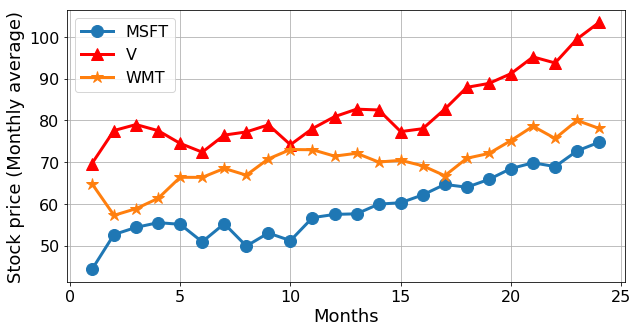

In [7]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,25)],mp['MSFT'],lw=3,marker='o',markersize=12)
plt.plot([i for i in range(1,25)],mp['V'],lw=3,c='red',marker='^',markersize=12)
plt.plot([i for i in range(1,25)],mp['WMT'],lw=3,marker='*',markersize=12)
plt.legend(mp.columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Stock price (Monthly average)",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

### Calculating Monthly Returns

In [8]:

for s in mp.columns:
    date = mp.index[0]
    pr0 = mp[s][date] 
    for t in range(1,len(mp.index)):
        date = mp.index[t]
        pr1 = mp[s][date]
        ret = (pr1-pr0)/pr0
        mr.set_value(date,s,ret)
        pr0 = pr1

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [9]:
mr.head()

,MSFT,V,WMT
1,0.189336,0.113695,-0.117212
2,0.032485,0.018433,0.027952
3,0.020791,-0.018479,0.041808
4,-0.007030,-0.039458,0.082545
5,-0.076420,-0.028192,-0.000301


In [10]:
# get symbol names
symbols = mr.columns

### Converting DF to Numpy matrix

In [11]:
return_data=mr.as_matrix().T

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


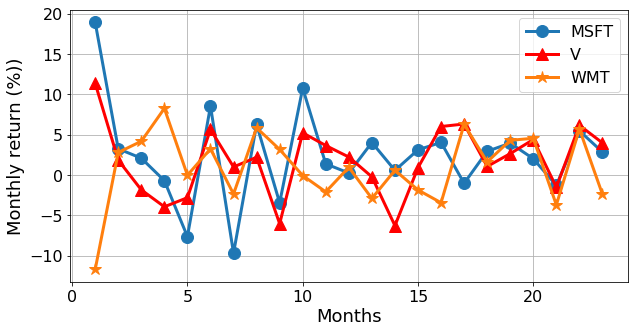

In [12]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1,24)],100*mr['MSFT'],lw=3,marker='o',markersize=12)
plt.plot([i for i in range(1,24)],100*mr['V'],lw=3,c='red',marker='^',markersize=12)
plt.plot([i for i in range(1,24)],100*mr['WMT'],lw=3,marker='*',markersize=12)
plt.legend(mp.columns,fontsize=16)
plt.xlabel("Months",fontsize=18)
plt.ylabel("Monthly return (%))",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

### Mean Return

In [13]:
r = np.asarray(np.mean(return_data, axis=1))

In [14]:
#Covariance Matrix
C = np.asmatrix(np.cov(return_data))
C

matrix([[ 0.00336865,  0.0016328 , -0.00075249],
        [ 0.0016328 ,  0.00183242, -0.00056339],
        [-0.00075249, -0.00056339,  0.00197676]])

In [15]:
for j in range(len(symbols)):
    print ('%s: Exp ret = %f, Risk = %f' %(symbols[j],r[j], C[j,j]**0.5))

MSFT: Exp ret = 0.024611, Risk = 0.058040
V: Exp ret = 0.018237, Risk = 0.042807
WMT: Exp ret = 0.009066, Risk = 0.044461


### Setting up the optimization model

In [16]:
# Number of variables
n = len(symbols)

# The variables vector
x = Variable(n)

# The minimum return
req_return = 0.02

# The return
ret = r.T*x

# The risk in xT.Q.x format
risk = quad_form(x, C)

# The core problem definition with the Problem class from CVXPY
prob = Problem(Minimize(risk), [sum(x)==1, ret >= req_return, x >= 0])

In [17]:
try:
    prob.solve()
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(len(symbols)):
       print (" Investment in {} : {}% of the portfolio".format(symbols[s],round(100*x.value[s],2)))
    print ("----------------------")
    print ("Exp ret = {}%".format(round(100*ret.value,2)))
    print ("Expected risk    = {}%".format(round(100*risk.value**0.5,2)))
except:
    print ("Error")

Optimal portfolio
----------------------
 Investment in MSFT : 58.28% of the portfolio
 Investment in V : 20.43% of the portfolio
 Investment in WMT : 21.29% of the portfolio
----------------------
Exp ret = 2.0%
Expected risk    = 3.83%


In [18]:
prob.status

'optimal'

In [19]:
x.value

array([0.58281755, 0.20432414, 0.21285832])